### COT Report data scraper

https://github.com/NDelventhal/cot_reports

In [47]:
pip install cot_reports  

Note: you may need to restart the kernel to use updated packages.


In [48]:
import pandas as pd
import cot_reports as cot
from matplotlib import pyplot as plt
import numpy as np
import re

In [49]:
%matplotlib widget
import matplotlib.pyplot as plt

### <u> 1. Instructions for using cot_reports </u>


From https://github.com/NDelventhal/cot_reports

#### Example: cot_hist()
df = cot.cot_hist(cot_report_type= 'traders_in_financial_futures_futopt')
#### cot_hist() downloads the historical bulk file for the specified report type, in this example the Traders in Financial Futures Futures-and-Options Combined report. Returns the data as dataframe.

#### Example: cot_year()
df = cot.cot_year(year = 2020, cot_report_type = 'traders_in_financial_futures_fut')
#### cot_year() downloads the single year file of the specified report type and year. Returns the data as dataframe.

#### Example for collecting data of a few years, here from 2017 to 2020, of a specified report:
df = pd.DataFrame()
begin_year = 2017
end_year = 2020
for i in range(begin_year, end_year + 1):
    single_year = pd.DataFrame(cot.cot_year(i, cot_report_type='legacy_futopt')) 
    df = df.append(single_year, ignore_index=True)

#### Example: cot_all()
df = cot.cot_all(cot_report_type='legacy_fut')
#### cot_all() downloads the historical bulk file and all remaining single year files of the specified report type.  Returns the data as dataframe.

### 2. Download and Compile COT Data into a pandas dataframe

In [50]:
#set your own time frame

df = pd.DataFrame()
begin_year = 2022
end_year = 2023
for i in range(begin_year, end_year + 1):
    single_year = pd.DataFrame(cot.cot_year(i, cot_report_type='legacy_futopt')) 
    df = df.append(single_year, ignore_index=True)

Selected: legacy_futopt
Downloaded single year data from: 2022
Selected: legacy_futopt
Downloaded single year data from: 2023


In [51]:
#rename columns to make them easier to call on later

df.rename(columns = {"Market and Exchange Names" : "Market", 
                     "As of Date in Form YYMMDD" : "Datetime", 
                     "Open Interest (All)" : "OI", 
                     "As of Date in Form YYYY-MM-DD" : "Date"}, inplace=True )

In [52]:
#transform datetime format to_datetime
df["Datetime"] = pd.to_datetime(df["Datetime"], format = '%y%m%d')

In [53]:
#check it worked
df.dtypes

Market                                               object
Datetime                                     datetime64[ns]
Date                                                 object
CFTC Contract Market Code                            object
CFTC Market Code in Initials                         object
                                                  ...      
Concentration-Net LT =8 TDR-Short (Other)           float64
Contract Units                                       object
CFTC Contract Market Code (Quotes)                   object
CFTC Market Code in Initials (Quotes)                object
CFTC Commodity Code (Quotes)                          int64
Length: 129, dtype: object

In [54]:
#explore markets
contracts = df.drop_duplicates(subset = ["Market"])
contracts.reset_index(inplace=True)
contracts["Market"]

0                     WHEAT-SRW - CHICAGO BOARD OF TRADE
1      BLACK SEA WHEAT FINANCIAL - CHICAGO BOARD OF T...
2                     WHEAT-HRW - CHICAGO BOARD OF TRADE
3            WHEAT-HRSpring - MINNEAPOLIS GRAIN EXCHANGE
4                          CORN - CHICAGO BOARD OF TRADE
                             ...                        
460          LITHIUM HYDROXIDE - COMMODITY EXCHANGE INC.
461            ALUM EUR UNPAID - COMMODITY EXCHANGE INC.
462       2 YEAR ERIS SOFR SWAP - CHICAGO BOARD OF TRADE
463      10 YEAR ERIS SOFR SWAP - CHICAGO BOARD OF TRADE
464       5 YEAR ERIS SOFR SWAP - CHICAGO BOARD OF TRADE
Name: Market, Length: 465, dtype: object

### 3. Explore Open Interest for a Commodity Category and Plot Line Graph

In [74]:
#create lists of commodity groups you're interested in and join: example softs
softs = ["cotton","orange",r"coffee c\b","sugar","cocoa","lumber"]

#alternate code: pattern = '|'.join([f'(?i){softs}' for soft in softs]) #?i is a flag that ignores case
pattern = '|'.join(softs)

In [75]:
softs = df[df["Market"].str.contains(pattern, case=False)]

Text(0, 0.5, 'Open Interest')

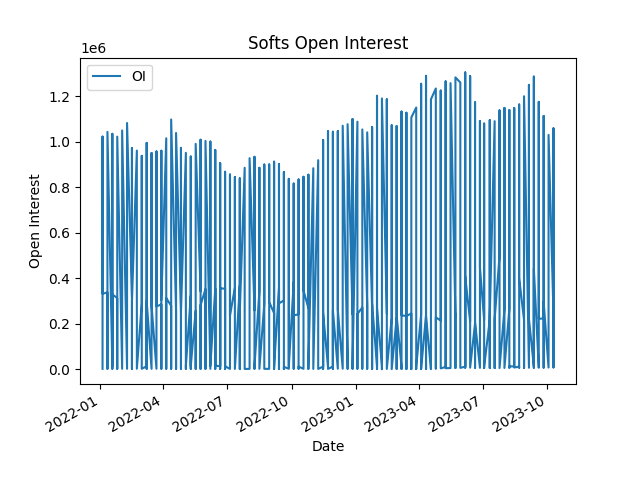

In [76]:
#Plot that shows overall OI in softs.
x = "Datetime"
y = "OI"

softs.plot(x,y)
plt.title("Softs Open Interest")
plt.xlabel("Date")
plt.ylabel("Open Interest")


#### Exploring coffee trying to explain line in the chars

In [105]:
lumber = df[df["Market"].str.contains("lumber", case=False)]
lumber["Market"].unique()

array(['RANDOM LENGTH LUMBER - CHICAGO MERCANTILE EXCHANGE',
       'LUMBER - CHICAGO MERCANTILE EXCHANGE'], dtype=object)

In [104]:
coffee = df[df["Market"].str.contains("coffee", case=False)]
coffee["Market"].unique()

array(['COFFEE C - ICE FUTURES U.S.',
       'COFFEE CALENDAR SPREAD OPTIONS - ICE FUTURES U.S.'], dtype=object)

In [82]:
coffee = df[df["Market"].str.contains(r"coffee c\b", case=False)]
coffee["Market"].unique()

array(['COFFEE C - ICE FUTURES U.S.'], dtype=object)

In [87]:
coffee.sort_values("Datetime") #sorting by datetime 

,Market,Datetime,Date,CFTC Contract Market Code,CFTC Market Code in Initials,CFTC Region Code,CFTC Commodity Code,OI,Noncommercial Positions-Long (All),Noncommercial Positions-Short (All),...,Concentration-Gross LT =8 TDR-Long (Other),Concentration-Gross LT =8 TDR-Short(Other),Concentration-Net LT =4 TDR-Long (Other),Concentration-Net LT =4 TDR-Short (Other),Concentration-Net LT =8 TDR-Long (Other),Concentration-Net LT =8 TDR-Short (Other),Contract Units,CFTC Contract Market Code (Quotes),CFTC Market Code in Initials (Quotes),CFTC Commodity Code (Quotes)
11515,COFFEE C - ICE FUTURES U.S.,2022-01-04,2022-01-04,083731,ICUS,1,83,332775,69223,12637,...,45.6,47.5,28.4,28.8,39.3,40.5,"(CONTRACTS OF 37,500 POUNDS)",083731,ICUS,83
11514,COFFEE C - ICE FUTURES U.S.,2022-01-11,2022-01-11,083731,ICUS,1,83,338178,72229,11040,...,44.3,47.1,26.5,26.5,37.1,37.8,"(CONTRACTS OF 37,500 POUNDS)",083731,ICUS,83
11513,COFFEE C - ICE FUTURES U.S.,2022-01-18,2022-01-18,083731,ICUS,1,83,329746,75116,9346,...,44.0,46.9,26.1,25.9,36.7,37.1,"(CONTRACTS OF 37,500 POUNDS)",083731,ICUS,83
11512,COFFEE C - ICE FUTURES U.S.,2022-01-25,2022-01-25,083731,ICUS,1,83,338615,74937,9993,...,43.1,47.4,25.2,24.5,35.4,37.6,"(CONTRACTS OF 37,500 POUNDS)",083731,ICUS,83
11511,COFFEE C - ICE FUTURES U.S.,2022-02-01,2022-02-01,083731,ICUS,1,83,340216,73954,10087,...,41.3,43.1,24.3,24.9,35.0,36.4,"(CONTRACTS OF 37,500 POUNDS)",083731,ICUS,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24121,COFFEE C - ICE FUTURES U.S.,2023-09-12,2023-09-12,083731,ICUS,1,83,225986,47606,68005,...,72.7,64.8,58.5,42.5,68.8,58.4,"(CONTRACTS OF 37,500 POUNDS)",083731,ICUS,83
24120,COFFEE C - ICE FUTURES U.S.,2023-09-19,2023-09-19,083731,ICUS,1,83,222211,49348,56900,...,71.4,64.8,57.3,42.6,67.7,58.7,"(CONTRACTS OF 37,500 POUNDS)",083731,ICUS,83
24119,COFFEE C - ICE FUTURES U.S.,2023-09-26,2023-09-26,083731,ICUS,1,83,224510,48878,60714,...,68.7,64.4,56.3,42.7,65.1,58.4,"(CONTRACTS OF 37,500 POUNDS)",083731,ICUS,83
24118,COFFEE C - ICE FUTURES U.S.,2023-10-03,2023-10-03,083731,ICUS,1,83,241419,49721,67778,...,68.9,65.7,56.6,46.3,65.1,59.8,"(CONTRACTS OF 37,500 POUNDS)",083731,ICUS,83


In [91]:
#Look for duplicate date values
coffee[coffee.duplicated(subset = ["Datetime"])]

,Market,Datetime,Date,CFTC Contract Market Code,CFTC Market Code in Initials,CFTC Region Code,CFTC Commodity Code,OI,Noncommercial Positions-Long (All),Noncommercial Positions-Short (All),...,Concentration-Gross LT =8 TDR-Long (Other),Concentration-Gross LT =8 TDR-Short(Other),Concentration-Net LT =4 TDR-Long (Other),Concentration-Net LT =4 TDR-Short (Other),Concentration-Net LT =8 TDR-Long (Other),Concentration-Net LT =8 TDR-Short (Other),Contract Units,CFTC Contract Market Code (Quotes),CFTC Market Code in Initials (Quotes),CFTC Commodity Code (Quotes)


### 4. Explore Open Interest for a Specific Commodity and Plot Line Graph

In [92]:
#find markets including the word sugar, what out for duplication of markets
sugar = df[df["Market"].str.contains("sugar", case=False)]
sugar["Market"].unique()

array(['SUGAR NO. 11 - ICE FUTURES U.S.'], dtype=object)

In [94]:
sugar[sugar.duplicated(subset = ["OI"])]

,Market,Datetime,Date,CFTC Contract Market Code,CFTC Market Code in Initials,CFTC Region Code,CFTC Commodity Code,OI,Noncommercial Positions-Long (All),Noncommercial Positions-Short (All),...,Concentration-Gross LT =8 TDR-Long (Other),Concentration-Gross LT =8 TDR-Short(Other),Concentration-Net LT =4 TDR-Long (Other),Concentration-Net LT =4 TDR-Short (Other),Concentration-Net LT =8 TDR-Long (Other),Concentration-Net LT =8 TDR-Short (Other),Contract Units,CFTC Contract Market Code (Quotes),CFTC Market Code in Initials (Quotes),CFTC Commodity Code (Quotes)


In [30]:
#check for any mission valuues 
sugar.isnull().sum().sort_values()

Market                                      0
Traders-Total (Other)                       0
Traders-Total Reportable-Short (Old)        0
Traders-Total Reportable-Long (Old)         0
Traders-Commercial-Short (Old)              0
                                           ..
Nonreportable Positions-Long (Other)        0
Total Reportable Positions-Short (Other)    0
Total Reportable Positions-Long (Other)     0
% of OI-Total Reportable-Long (Old)         0
CFTC Commodity Code (Quotes)                0
Length: 129, dtype: int64

In [110]:
sugar.sort_values(['Datetime'], inplace = True)

<ipython-input-110-02dff4bb8e88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sugar.sort_values(['Datetime'], inplace = True)


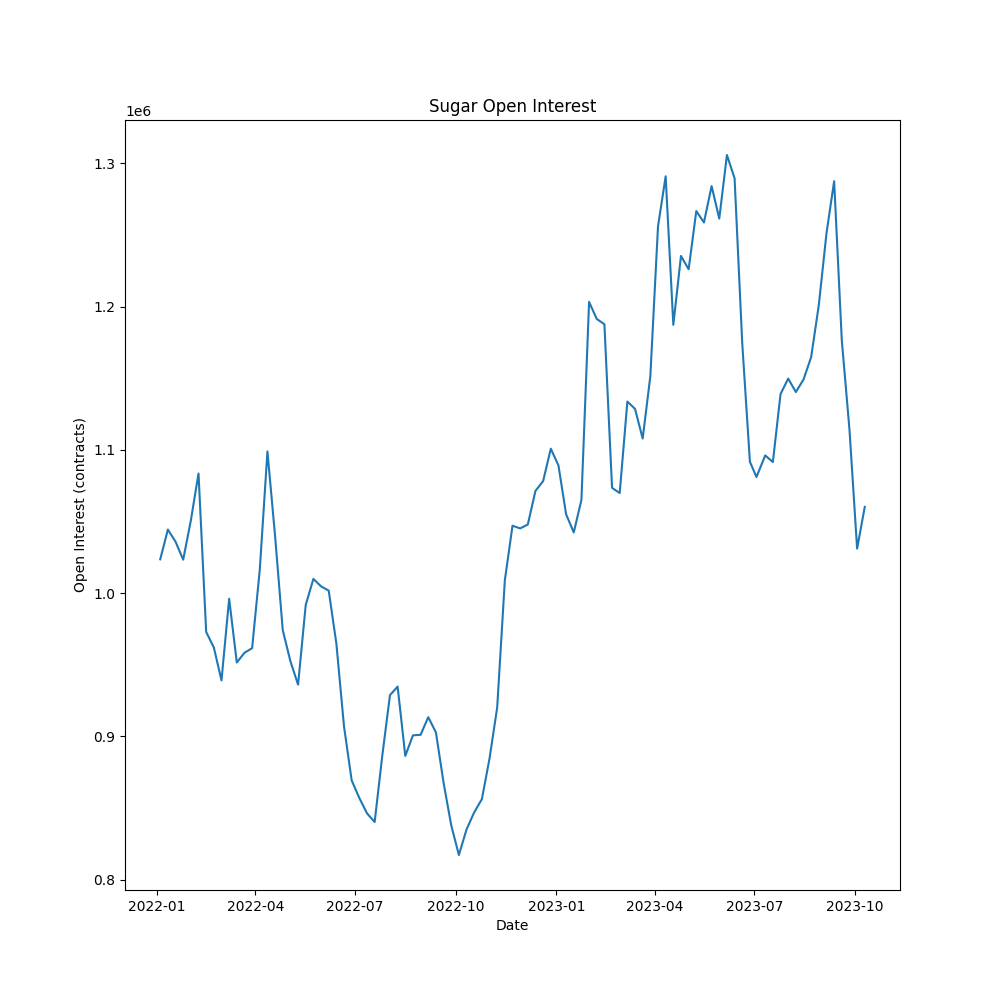

In [111]:
x = sugar["Datetime"]
y = sugar["OI"]


plt.figure(figsize = (10,10))

plt.title("Sugar Open Interest")
plt.xlabel("Date")
plt.ylabel("Open Interest (contracts)")
plt.plot(x,y)

plt.show()


### 5. Create Index Value for a Commodity 

In [35]:
#create new DF for this part of the analysis
df2 = df.sort_values(['Market', 'Datetime'], ascending = [True, True])

In [36]:
#Group markerss and add Open Interest Index Column

group = df2.groupby("Market")["OI"]
df2["OI_Index"] = group.transform(lambda x: (((x - min(x)) / (max(x) - min(x))) * 100))

## Forumla for indexing:
#zi = (xi – min(x)) / (max(x) – min(x)) * 100 = (12 – 12) / (68 – 12) * 100 = 0


In [ ]:
#select a market to check new column
df2[df2["Market"] == "SUGAR NO. 11 - ICE FUTURES U.S."]

In [39]:
sugar = df2[df2["Market"].str.contains("sugar", case=False)]

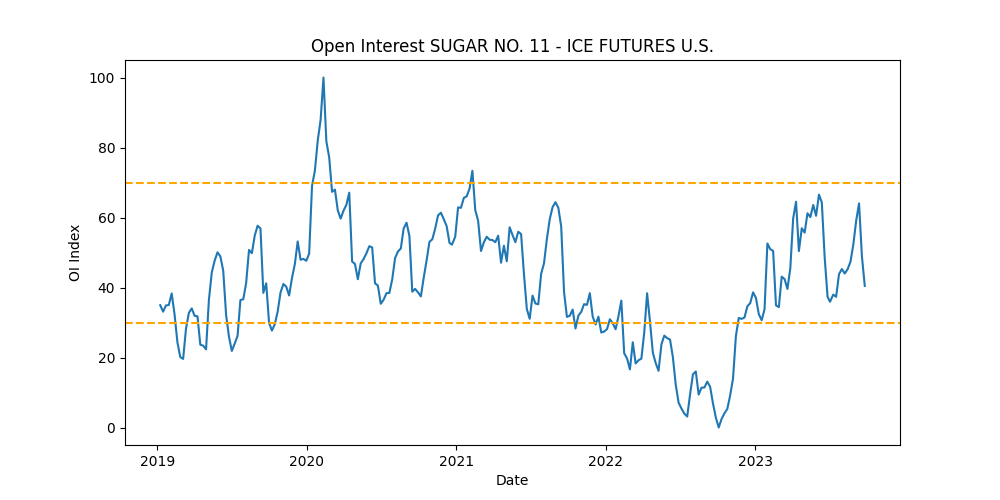

In [41]:
#Create Graph. Dashed lines help view extreme values

x = sugar["Datetime"]
y = sugar["OI_Index"]
market = sugar["Market"]

fig, ax = plt.subplots(figsize =(10,5))
ax.set_title(f'Open Interest {market.iloc[0]}')
ax.set_xlabel("Date")
ax.set_ylabel("OI Index")
ax.plot (x,y)

high_value = 70
low_value = 30
#axhline is horizonal line
ax.axhline(y=high_value, color = 'orange', linestyle = 'dashed')
ax.axhline(y=low_value, color = 'orange', linestyle = 'dashed')


ax.autoscale(axis='y')


plt.show()

### 6. Create Open Interest Indexed Graphs for a list of commodities

In [114]:
softs = ["cotton", r"coffee c\b", "sugar", "cocoa"]
#note this list will include more than one market where the key word is duplicated, e.g coffee

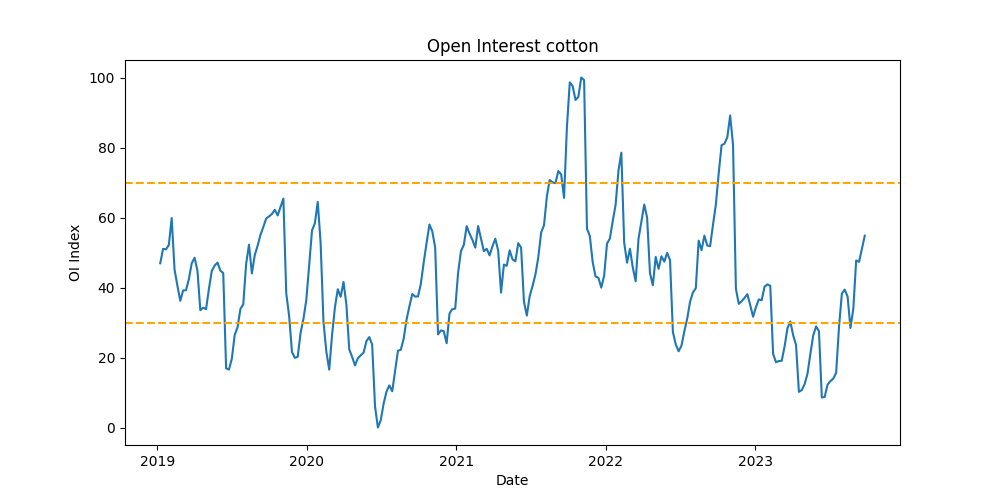

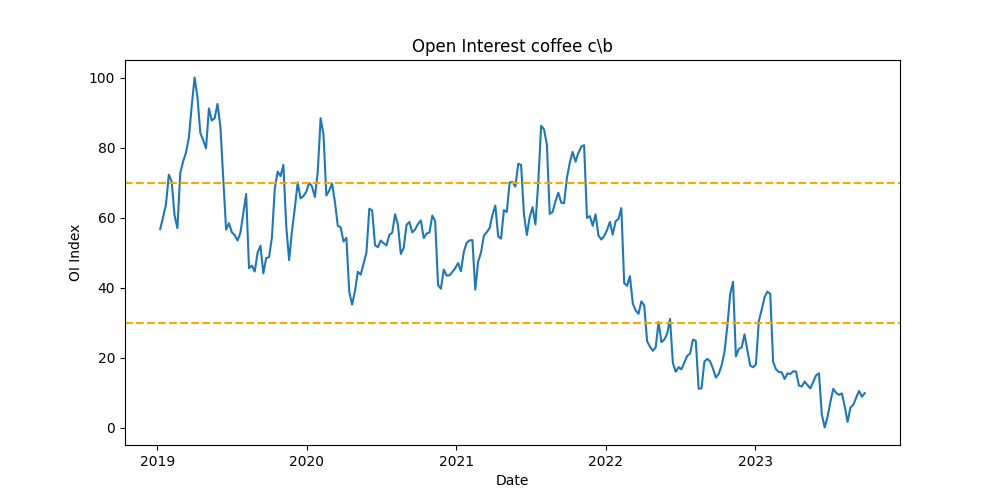

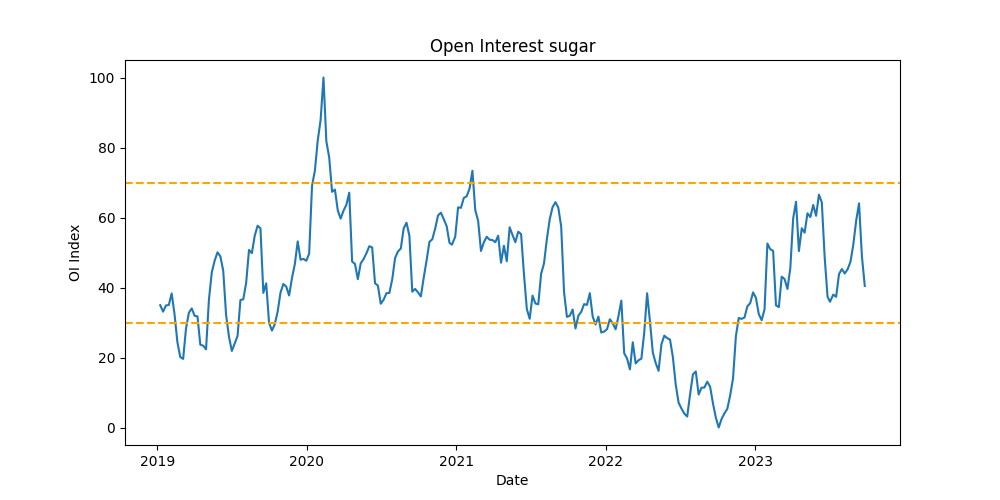

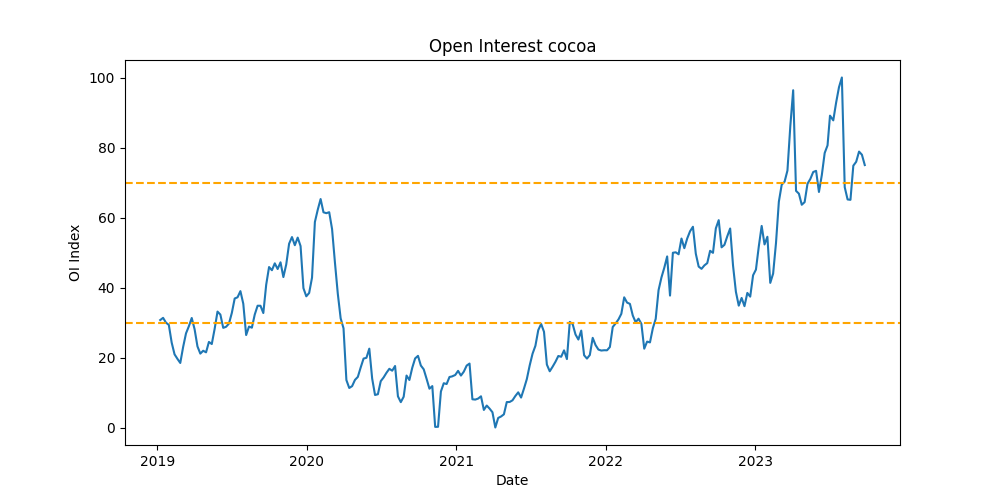

In [115]:
for market_name in softs:
    
    market_data = df2[df2["Market"].str.contains(market_name, case=False)]

    #set the graph
    fig, ax = plt.subplots(figsize =(10,5))
    ax.set_title(f'Open Interest {market_name}')
    ax.set_xlabel("Date")
    ax.set_ylabel("OI Index")
    
    #plot the market
    x = market_data["Datetime"]
    y = market_data["OI_Index"]
    ax.plot (x,y)

    high_value = 70
    low_value = 30
    #axhline is horizonal line
    ax.axhline(y=high_value, color = 'orange', linestyle = 'dashed')
    ax.axhline(y=low_value, color = 'orange', linestyle = 'dashed')

    ax.autoscale(axis='y')

    plt.show()

In [79]:
plt.close()

In [81]:
#figure coffee duplication issue